In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [3]:
ls -ls

total 3336
 136 -rw-r--r--@ 1 nadeemh  413954161    67707 Mar 13 20:09 algo_returns.csv
  56 -rw-r--r--  1 nadeemh  413954161    27158 Mar 18 22:17 fb_data.csv
2736 -rw-r--r--  1 nadeemh  413954161  1399479 Mar 20 17:22 homework04.ipynb
  24 -rw-r--r--@ 1 nadeemh  413954161     9443 Mar 13 20:09 l_historical.csv
  24 -rw-r--r--@ 1 nadeemh  413954161    11426 Mar 13 20:09 shop_historical.csv
  16 -rw-r--r--  1 nadeemh  413954161     8123 Mar 18 22:17 snap_data.csv
  96 -rw-r--r--@ 1 nadeemh  413954161    46752 Mar 13 20:09 sp_tsx_history.csv
  48 -rw-r--r--  1 nadeemh  413954161    20599 Mar 18 22:17 twtr_data.csv
 200 -rw-r--r--@ 1 nadeemh  413954161   100960 Mar 13 20:09 whale_returns.csv


In [4]:
# Reading whale returns and set index to column 'Date'

whales_returns_df = pd.read_csv('whale_returns.csv')
whales_returns_df = whales_returns_df.set_index(pd.to_datetime(whales_returns_df['Date'], infer_datetime_format=True))
whales_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Drop the extra date column

whales_returns_df = whales_returns_df.drop(columns = ['Date'])
whales_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Assess data quality by determining the number of nulls

whales_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls

# whales_returns_df = whales_returns_df.dropna().copy()
whales_returns_df.dropna(inplace=True)

In [8]:
# Checking number of nulls again

whales_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
###  Algorithmic Daily Returns

# Read the algorithmic daily returns and clean the data.

algo_returns_df = pd.read_csv('algo_returns.csv')
algo_returns_df = algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True))
algo_returns_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [10]:
# Drop the extra date column

algo_returns_df = algo_returns_df.drop(columns = ['Date'])
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [11]:
# Assess data quality by determining the number of nulls

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls

algo_returns_df.dropna(inplace=True)

In [13]:
# Checking number of nulls again

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
###  S&P TSX 60 Returns

# Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

sp_tsx_historical_df = pd.read_csv('sp_tsx_history.csv')
sp_tsx_historical_df = sp_tsx_historical_df.set_index(pd.to_datetime(sp_tsx_historical_df['Date'], infer_datetime_format=True))
sp_tsx_historical_df.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,"$12,370.19"
2012-10-02,2-Oct-2012,"$12,391.23"
2012-10-03,3-Oct-2012,"$12,359.47"
2012-10-04,4-Oct-2012,"$12,447.68"
2012-10-05,5-Oct-2012,"$12,418.99"


In [15]:
sp_tsx_historical_df.dtypes

Date     object
Close    object
dtype: object

In [16]:
# Drop the extra date column

sp_tsx_historical_df = sp_tsx_historical_df.drop(columns = ['Date'])
sp_tsx_historical_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [17]:
# Clean identified numeric fields with $ symbol

sp_tsx_historical_df["Close"] = sp_tsx_historical_df["Close"].str.replace("$", "")
sp_tsx_historical_df["Close"] = sp_tsx_historical_df["Close"].str.replace(",", "")
sp_tsx_historical_df.head()

/var/folders/tc/wvhdkgsj6qvgf5x50xvbl9059llf1p/T/ipykernel_43477/269619879.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_historical_df["Close"] = sp_tsx_historical_df["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [18]:
# Convert 'Close' from 'object' to 'float'

sp_tsx_historical_df['Close'] = sp_tsx_historical_df['Close'].astype('float')
sp_tsx_historical_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [19]:
sp_tsx_historical_df.dtypes

Close    float64
dtype: object

In [20]:
# Calculate Daily Returns

daily_returns_sp_tsx60_df = sp_tsx_historical_df.pct_change()
daily_returns_sp_tsx60_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [21]:
daily_returns_sp_tsx60_df.dropna(inplace=True)

In [22]:
# Rename `Close` Column to be specific to this portfolio.

daily_returns_sp_tsx60_df = daily_returns_sp_tsx60_df.rename( columns = {'Close' : 'S&P TSX'} )
daily_returns_sp_tsx60_df

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns_df = pd.concat( [whales_returns_df, algo_returns_df, daily_returns_sp_tsx60_df], axis="columns", join="inner" )

# Sort datetime index in ascending order (past to present)

combined_returns_df = combined_returns_df.sort_index()
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


<AxesSubplot:xlabel='Date'>

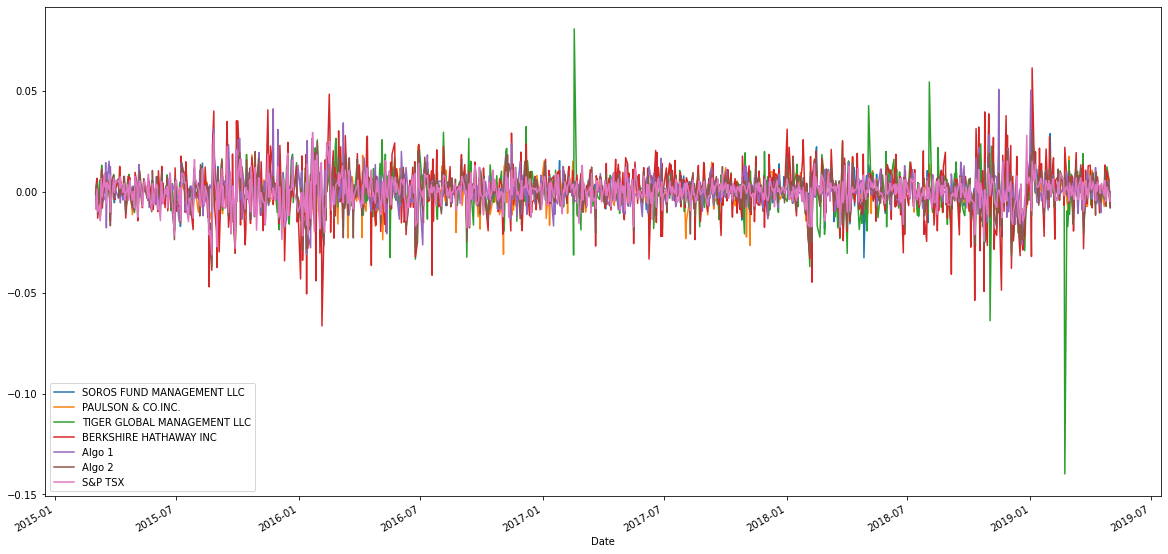

In [24]:
### Conduct Quantitative Analysis
## Performance Analysis
# Plot daily returns of all portfolios

combined_returns_df.plot(figsize = (20, 10))

In [25]:
# Calculate and Plot cumulative returns.

cumulative_returns_df = (1 + combined_returns_df).cumprod()
cumulative_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

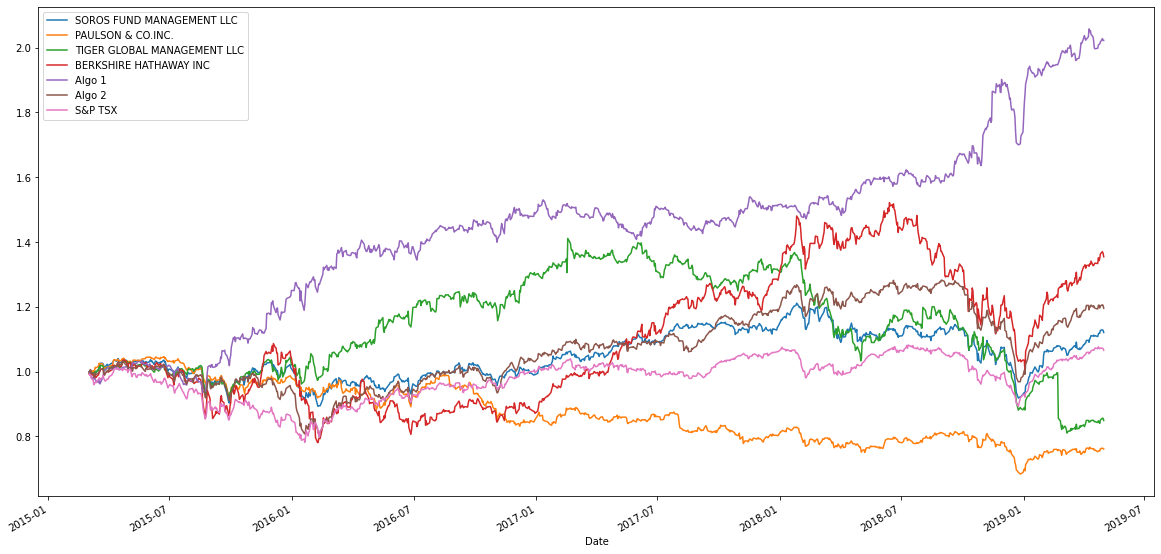

In [26]:
# Plot cumulative returns

cumulative_returns_df.plot(figsize = (20, 10))

In [27]:
### Algorithimic Portfolio outperforms the S&P TSX 60

In [28]:
### Risk Analysis -- Determine the risk of each portfolio:

# 1. Create a box plot for each portfolio.
# 2. Calculate the standard deviation for all portfolios.
# 3. Determine which portfolios are riskier than the S&P TSX 60.
# 4. Calculate the Annualized Standard Deviation.

<AxesSubplot:>

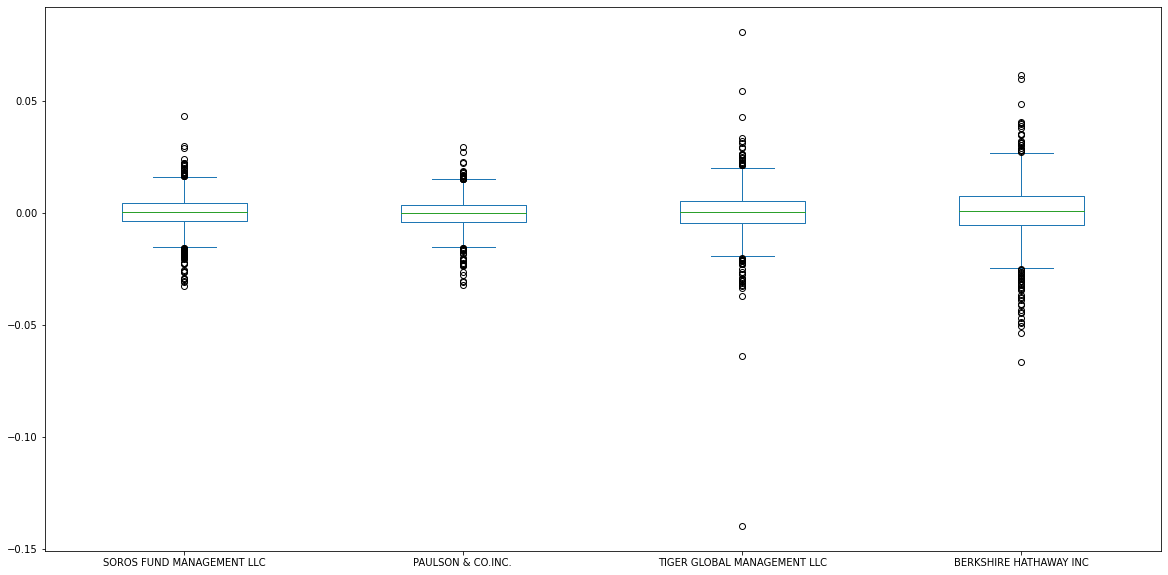

In [29]:
# Whales Returns Box Plot

whales_returns_df.plot(figsize = (20, 10), kind='box')

<AxesSubplot:>

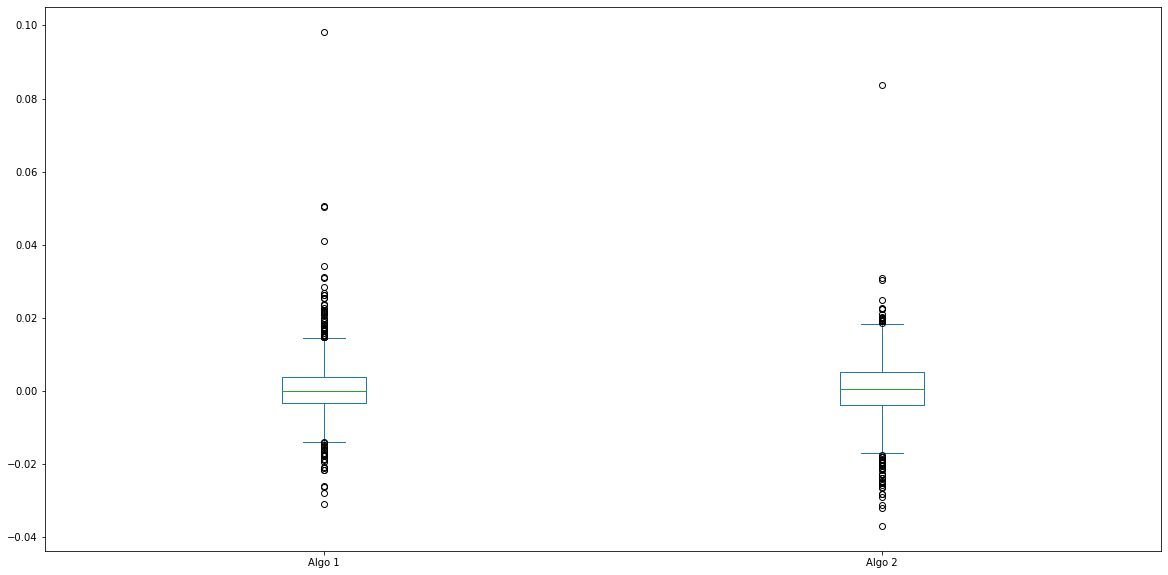

In [30]:
# Algo Returns Box Plot

algo_returns_df.plot(figsize = (20, 10), kind='box')

<AxesSubplot:>

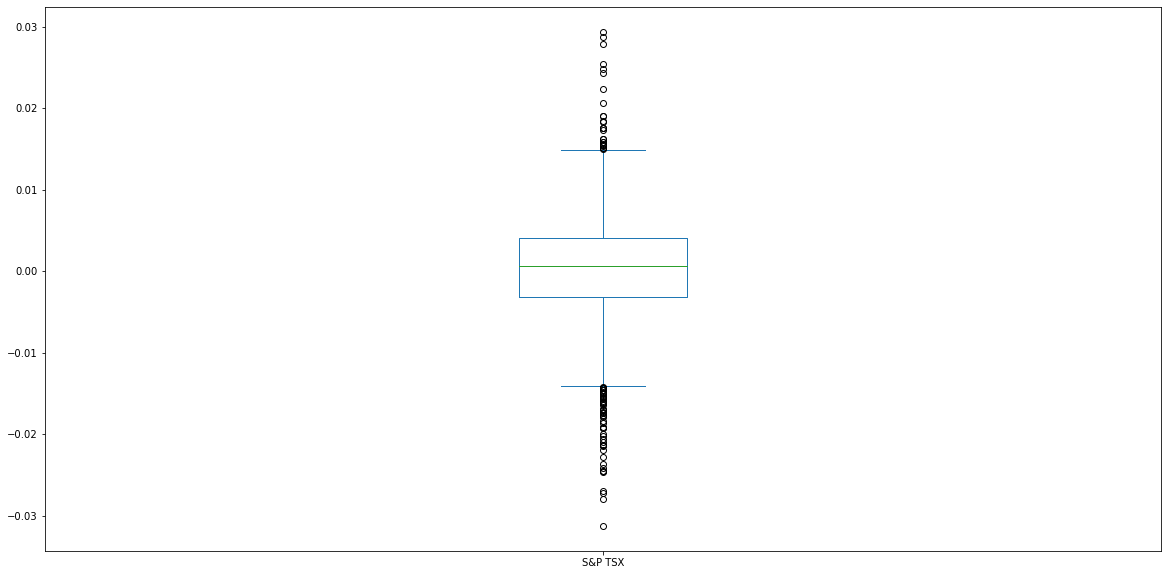

In [31]:
# S&P TSX 60 Returns Box Plot

daily_returns_sp_tsx60_df.plot(kind='box', figsize = (20, 10))

<AxesSubplot:>

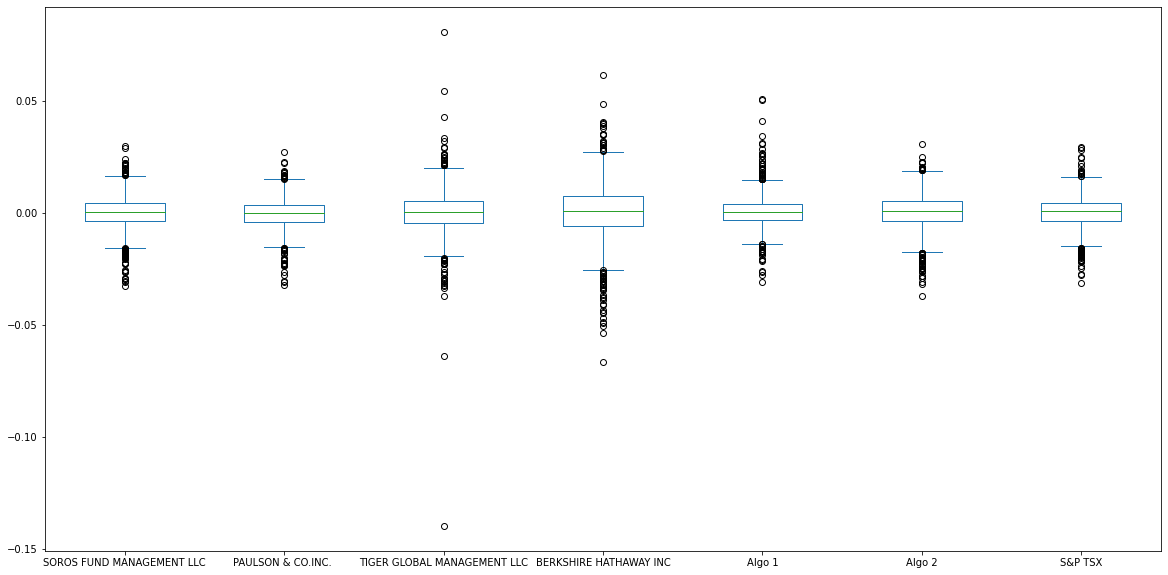

In [32]:
combined_returns_df.plot(kind='box', figsize = (20, 10))

In [33]:
# Calculate the daily standard deviations of all portfolios

whales_std = whales_returns_df.std()
whales_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [34]:
algo_std = algo_returns_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [35]:
# Calculate the daily standard deviation of S&P TSX 60

sp_tsx60_std = daily_returns_sp_tsx60_df.std()
sp_tsx60_std.head()

S&P TSX    0.006637
dtype: float64

In [36]:
combined_returns_df_std = combined_returns_df.std().sort_values(ascending=False)
combined_returns_df_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [37]:
### Determine which portfolios are riskier than the S&P TSX 60

### All funds in both the algorithimic and whale portfolios (exccept the PAULSON & CO.INC) are riskier than S&P TSX 60. 

In [38]:
# Calculate the Annualized Standard Deviation (252 trading days)

annualized_std = combined_returns_df_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

In [39]:
# Rolling Statistics
# 1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
# 2. Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
# 3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std = cumulative_returns_df.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.015754,0.006179,0.006981,0.016593,0.018872,0.010163,0.010811
2019-04-26,0.015466,0.006044,0.006469,0.015123,0.017821,0.008370,0.010414
2019-04-29,0.015122,0.005417,0.006635,0.014523,0.017718,0.007139,0.009874


In [41]:
rolling_std.dropna(inplace=True)
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-31,0.011687,0.009517,0.009523,0.008578,0.015339,0.007349,0.008347
2015-04-01,0.011639,0.008790,0.009513,0.008620,0.016029,0.007412,0.007641
2015-04-02,0.011715,0.008262,0.009479,0.008689,0.016918,0.007649,0.007384
2015-04-06,0.012132,0.008049,0.009673,0.008746,0.017504,0.008201,0.007369
2015-04-07,0.012004,0.007407,0.009220,0.009107,0.018098,0.008589,0.008469
...,...,...,...,...,...,...,...
2019-04-25,0.015754,0.006179,0.006981,0.016593,0.018872,0.010163,0.010811
2019-04-26,0.015466,0.006044,0.006469,0.015123,0.017821,0.008370,0.010414
2019-04-29,0.015122,0.005417,0.006635,0.014523,0.017718,0.007139,0.009874


<AxesSubplot:xlabel='Date'>

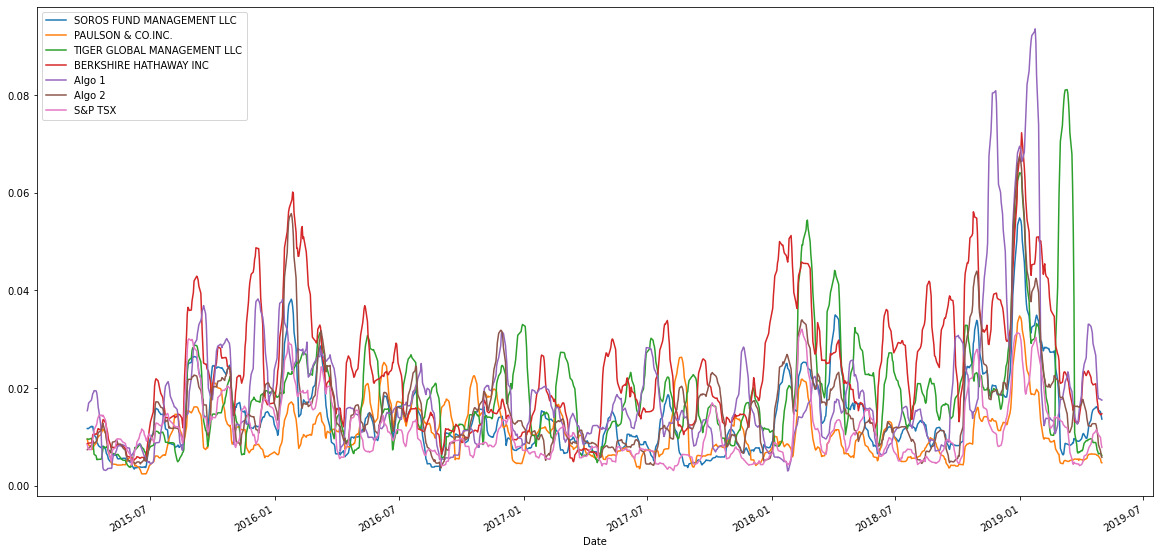

In [42]:
# Plot the rolling standard deviation

rolling_std.plot(figsize = (20, 10))

In [43]:
# Calculate the correlation

# correlation = cumulative_daily_returns_df.corr()
correlation = combined_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

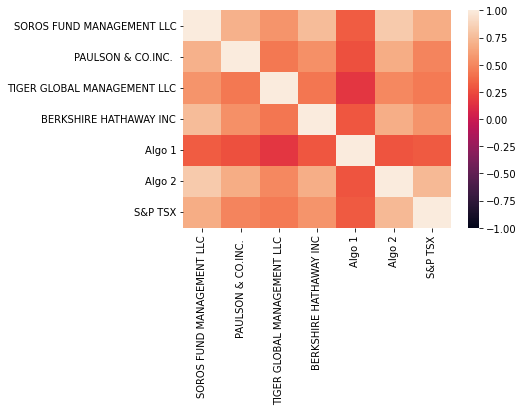

In [44]:
 # Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=-1, vmax=1)

In [45]:
# Calculate and Plot Beta for a chosen portfolio and the S&P TSX 60
# Calculate covariance of a single portfolio
# Calculate variance of S&P TSX
# Computing beta
# Plot beta trend

soros_covariance = combined_returns_df["SOROS FUND MANAGEMENT LLC"].cov(combined_returns_df["S&P TSX"])
print(f"Soros Fund covariance: {soros_covariance}")

Soros Fund covariance: 3.710689907855223e-05


In [46]:
# Calculate variance of S&P TSX

sp_tsx60_var = combined_returns_df["S&P TSX"].var()
sp_tsx60_var

4.9479515915131015e-05

In [47]:
# Computing beta
soros_beta = soros_covariance / sp_tsx60_var
soros_beta

0.7499446668435332

In [48]:
# Calculate 60-day Rolling Betas of SOROS vs S&P

rolling_soros_covariance = combined_returns_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_returns_df["S&P TSX"])
rolling_sp_tsx60_var = combined_returns_df["S&P TSX"].rolling(window=60).var()
rolling_soros_beta = rolling_soros_covariance / rolling_sp_tsx60_var

<AxesSubplot:title={'center':'Rolling 60-day Beta of Soros Fund'}, xlabel='Date'>

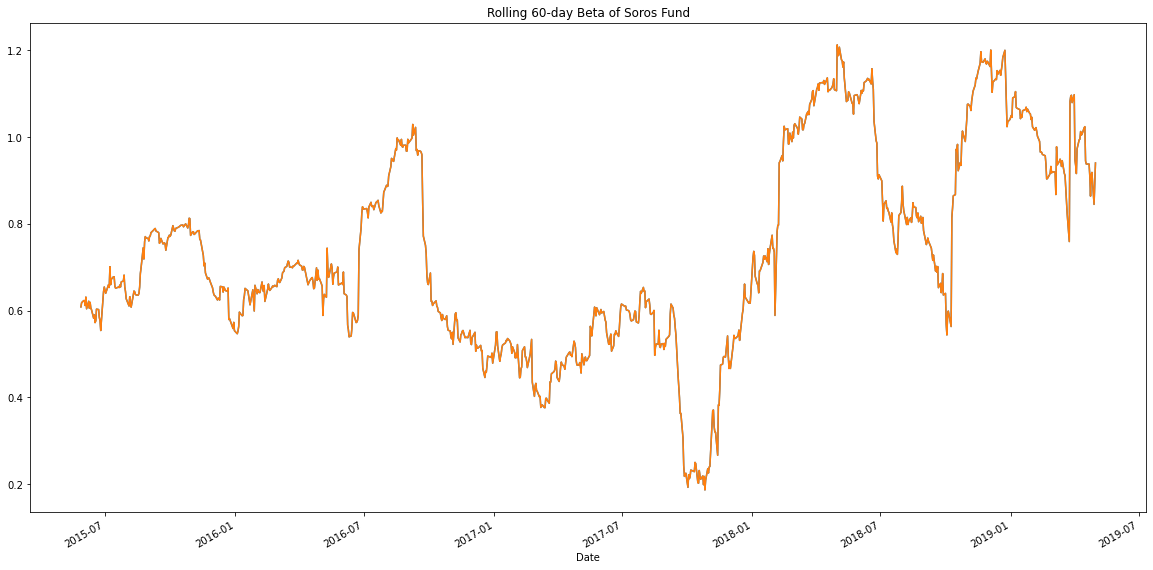

In [49]:
# Plot beta trend

ax = rolling_soros_beta.plot(figsize = (20, 10), title="Rolling 60-day Beta of Soros Fund")
rolling_soros_beta.plot(ax=ax)

In [50]:
## Rolling Statistics Challenge: Exponentially Weighted Average
# # Use `ewm` to calculate the rolling window

In [51]:
# Sharpe Ratios
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
# Annualized Sharpe Ratios

sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

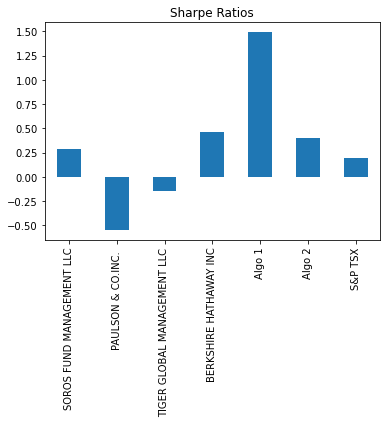

In [52]:
# Plot sharpe ratios using a bar chart
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [53]:
# Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

# Algo 1 outperforms both S&P TSX 60 and the whales portfolios
# Algo 2 outperforms S&P TSX 60 and marginally underperforms the whales portfolios

# In a nutshell, the algorithmic trading portfolios are doing well as compared to the market and whales portfolios.

In [54]:
# Create Custom Portfolio
# In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60.

# Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
# Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
# Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
# Include correlation analysis to determine which stocks (if any) are correlated.


In [55]:
# Twitter

twtr_df = pd.read_csv('twtr_data.csv')
twtr_df = twtr_df.set_index(pd.to_datetime(twtr_df['date'], infer_datetime_format=True))
twtr_df.head()

,date,close
date,,
2019-05-17,5/17/19,37.50
2019-05-16,5/16/19,38.30
2019-05-15,5/15/19,37.90
2019-05-14,5/14/19,36.93
2019-05-13,5/13/19,36.59


In [56]:
# Drop the extra date column and rename the close column

twtr_df = twtr_df.drop(columns = ['date'])
twtr_df = twtr_df.rename( columns = {'close' : 'TWTR'} )
twtr_df.head()

,TWTR
date,
2019-05-17,37.50
2019-05-16,38.30
2019-05-15,37.90
2019-05-14,36.93
2019-05-13,36.59


In [57]:
# Facebook

fb_df = pd.read_csv('fb_data.csv')
fb_df = fb_df.set_index(pd.to_datetime(fb_df['date'], infer_datetime_format=True))
fb_df.head()

,date,close
date,,
2019-05-17,5/17/19,185.30
2019-05-16,5/16/19,186.99
2019-05-15,5/15/19,186.27
2019-05-14,5/14/19,180.73
2019-05-13,5/13/19,181.54


In [58]:
# Drop the extra date column

fb_df = fb_df.drop(columns = ['date'])
fb_df = fb_df.rename( columns = {'close' : 'FB'} )
fb_df.head()

,FB
date,
2019-05-17,185.30
2019-05-16,186.99
2019-05-15,186.27
2019-05-14,180.73
2019-05-13,181.54


In [59]:
# Snapchat

snap_df = pd.read_csv('snap_data.csv')
snap_df = snap_df.set_index(pd.to_datetime(snap_df['date'], infer_datetime_format=True))
snap_df.head()

,date,close
date,,
2019-05-17,5/17/19,11.49
2019-05-16,5/16/19,11.42
2019-05-15,5/15/19,10.66
2019-05-14,5/14/19,10.49
2019-05-13,5/13/19,10.11


In [60]:
# Drop the extra date column

snap_df = snap_df.drop(columns = ['date'])
snap_df = snap_df.rename( columns = {'close' : 'SNAP'} )
snap_df.head()

,SNAP
date,
2019-05-17,11.49
2019-05-16,11.42
2019-05-15,10.66
2019-05-14,10.49
2019-05-13,10.11


In [61]:
 # Combine all stocks in a single DataFrame

combined_custom_df = pd.concat( [twtr_df, fb_df, snap_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)

combined_custom_df = combined_custom_df.sort_index()
combined_custom_df

,TWTR,FB,SNAP
date,,,
2017-03-02,15.79,136.76,24.48
2017-03-03,15.75,137.17,27.09
2017-03-06,15.56,137.42,23.77
2017-03-07,15.18,137.30,21.44
2017-03-08,15.24,137.72,22.81
...,...,...,...
2019-05-13,36.59,181.54,10.11
2019-05-14,36.93,180.73,10.49
2019-05-15,37.90,186.27,10.66


In [62]:
# Calculate Daily Returns

combined_custom_return_df = combined_custom_df.pct_change()
combined_custom_return_df.head()

,TWTR,FB,SNAP
date,,,
2017-03-02,NaN,NaN,NaN
2017-03-03,-0.002533,0.002998,0.106618
2017-03-06,-0.012063,0.001823,-0.122554
2017-03-07,-0.024422,-0.000873,-0.098023
2017-03-08,0.003953,0.003059,0.063899


In [63]:
combined_custom_return_df.dropna(inplace=True)
combined_custom_return_df

,TWTR,FB,SNAP
date,,,
2017-03-03,-0.002533,0.002998,0.106618
2017-03-06,-0.012063,0.001823,-0.122554
2017-03-07,-0.024422,-0.000873,-0.098023
2017-03-08,0.003953,0.003059,0.063899
2017-03-09,-0.001312,0.003776,-0.004384
...,...,...,...
2019-05-13,-0.048375,-0.036105,-0.036225
2019-05-14,0.009292,-0.004462,0.037587
2019-05-15,0.026266,0.030653,0.016206


In [64]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock (1000 shares of each)
# Set weights

weights = [1/3, 1/3, 1/3]

# weighted_returns_df = weights * combined_daily_return_df
weighted_returns_df = combined_custom_return_df.dot(weights)
weighted_returns_df

date
2017-03-03    0.035694
2017-03-06   -0.044265
2017-03-07   -0.041106
2017-03-08    0.023637
2017-03-09   -0.000640
                ...   
2019-05-13   -0.040235
2019-05-14    0.014139
2019-05-15    0.024375
2019-05-16    0.028571
2019-05-17   -0.007932
Length: 556, dtype: float64

In [65]:
weighted_returns_df = pd.DataFrame(weighted_returns_df).rename(columns = {0 : "My Portfolio"})
weighted_returns_df
# weighted_returns_df.columns = ["My Portfolio"]
# weighted_returns_df

,My Portfolio
date,
2017-03-03,0.035694
2017-03-06,-0.044265
2017-03-07,-0.041106
2017-03-08,0.023637
2017-03-09,-0.000640
...,...
2019-05-13,-0.040235
2019-05-14,0.014139
2019-05-15,0.024375


In [66]:
cumulative_returns_df = (1 + weighted_returns_df).cumprod()
cumulative_returns_df

,My Portfolio
date,
2017-03-03,1.035694
2017-03-06,0.989849
2017-03-07,0.949160
2017-03-08,0.971596
2017-03-09,0.970974
...,...
2019-05-13,1.245808
2019-05-14,1.263422
2019-05-15,1.294219


In [67]:
# Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# Join your returns DataFrame to the original returns DataFrame

total_df = pd.concat( [cumulative_returns_df, combined_returns_df], axis="columns", join="inner")
total_df

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
2017-03-03,1.035694,0.001050,0.000191,0.002118,0.001445,-0.003131,0.000827,0.004625
2017-03-06,0.989849,-0.003016,-0.010073,-0.004702,-0.006102,-0.001548,-0.005750,0.001361
2017-03-07,0.949160,-0.005288,-0.007044,-0.004209,0.000338,-0.001838,-0.007664,-0.001342
2017-03-08,0.971596,-0.004496,-0.001563,0.000866,0.002992,-0.003141,-0.004234,-0.007163
2017-03-09,0.970974,0.000069,-0.001656,0.003661,-0.001979,-0.000414,-0.002858,-0.000009
...,...,...,...,...,...,...,...,...
2019-04-25,1.321086,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,1.324124,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,1.356918,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,1.351967,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183


In [68]:
total_df.dropna(inplace=True)

In [69]:
# Calculate the Annualized Standard Deviation

total_std = total_df.std()
total_std

My Portfolio                   0.160797
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006687
TIGER GLOBAL MANAGEMENT LLC    0.011521
BERKSHIRE HATHAWAY INC         0.012606
Algo 1                         0.006710
Algo 2                         0.007607
S&P TSX                        0.005608
dtype: float64

In [70]:
total_std = total_std.sort_values(ascending=False)
total_std

My Portfolio                   0.160797
BERKSHIRE HATHAWAY INC         0.012606
TIGER GLOBAL MANAGEMENT LLC    0.011521
SOROS FUND MANAGEMENT LLC      0.007842
Algo 2                         0.007607
Algo 1                         0.006710
PAULSON & CO.INC.              0.006687
S&P TSX                        0.005608
dtype: float64

In [71]:
annualized_total_std = total_std * np.sqrt(252)
annualized_total_std

My Portfolio                   2.552576
BERKSHIRE HATHAWAY INC         0.200117
TIGER GLOBAL MANAGEMENT LLC    0.182887
SOROS FUND MANAGEMENT LLC      0.124493
Algo 2                         0.120760
Algo 1                         0.106522
PAULSON & CO.INC.              0.106147
S&P TSX                        0.089026
dtype: float64

In [84]:
# Calculate and plot rolling std with 21-day window
# Calculate rolling standard deviation

rolling_total_std = total_df.rolling(window=21).std()
rolling_total_std

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
2017-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.045399,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.042094,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.041158,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356
2019-04-30,0.039400,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240


In [85]:
rolling_total_std.dropna(inplace=True)
rolling_total_std

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
2017-03-31,0.026046,0.005055,0.004540,0.004305,0.007590,0.003388,0.006920,0.005103
2017-04-03,0.020122,0.005166,0.004571,0.004273,0.007594,0.003309,0.007035,0.005025
2017-04-04,0.018918,0.005105,0.004156,0.004167,0.007694,0.003372,0.006927,0.005159
2017-04-05,0.019332,0.005340,0.003945,0.004093,0.007721,0.003525,0.006861,0.005164
2017-04-06,0.019865,0.005346,0.004095,0.004119,0.008285,0.003455,0.007064,0.004931
...,...,...,...,...,...,...,...,...
2019-04-25,0.045399,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.042094,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.041158,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356
2019-04-30,0.039400,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240


<AxesSubplot:>

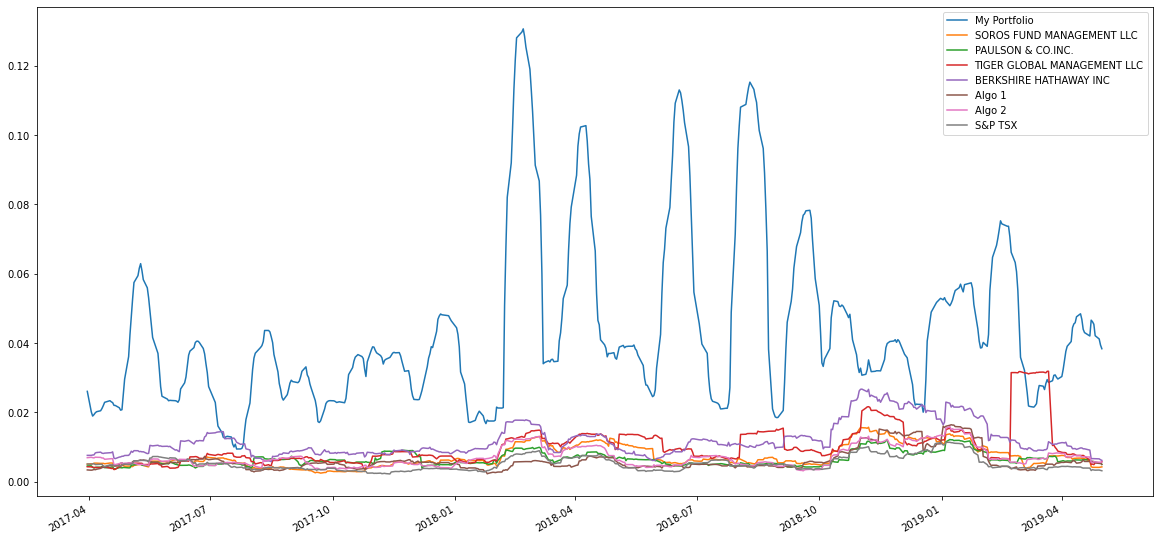

In [74]:
rolling_total_std.plot( figsize = (20, 10) )

In [75]:
# Calculate and plot the correlation
correlation_custom = total_df.corr()
correlation_custom

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
My Portfolio,1.000000,0.058260,0.097730,0.026881,0.048870,-0.020527,0.089738,0.070095
SOROS FUND MANAGEMENT LLC,0.058260,1.000000,0.702304,0.501135,0.754518,0.260128,0.801467,0.642638
PAULSON & CO.INC.,0.097730,0.702304,1.000000,0.456041,0.574585,0.274334,0.727784,0.543481
TIGER GLOBAL MANAGEMENT LLC,0.026881,0.501135,0.456041,1.000000,0.366358,0.097333,0.456202,0.382851
BERKSHIRE HATHAWAY INC,0.048870,0.754518,0.574585,0.366358,1.000000,0.231084,0.739086,0.600690
Algo 1,-0.020527,0.260128,0.274334,0.097333,0.231084,1.000000,0.275558,0.263909
Algo 2,0.089738,0.801467,0.727784,0.456202,0.739086,0.275558,1.000000,0.716601
S&P TSX,0.070095,0.642638,0.543481,0.382851,0.600690,0.263909,0.716601,1.000000


<AxesSubplot:>

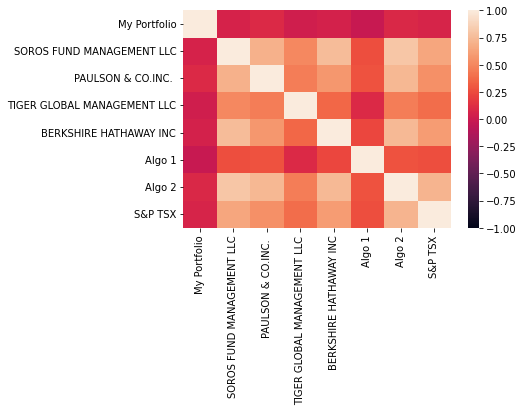

In [76]:
 # Create a heatmap from the correlation values
sns.heatmap(correlation_custom, vmin=-1, vmax=1)

In [77]:
# Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

portfolio_covariance = total_df["My Portfolio"].cov(total_df["S&P TSX"])
print(f"Portfolio covariance: {portfolio_covariance}")

Portfolio covariance: 6.320974209088212e-05


In [78]:
# Calculate 60-day Rolling Betas of Custom Portfolio vs S&P TSX

rolling_my_portfolio_covariance = total_df["My Portfolio"].rolling(window=60).cov(total_df["S&P TSX"])
rolling_sp_tsx60_var = total_df["S&P TSX"].rolling(window=60).var()
rolling_my_portfolio_beta = rolling_my_portfolio_covariance / rolling_sp_tsx60_var
rolling_my_portfolio_beta

2017-03-03         NaN
2017-03-06         NaN
2017-03-07         NaN
2017-03-08         NaN
2017-03-09         NaN
                ...   
2019-04-25   -0.960337
2019-04-26   -0.721281
2019-04-29   -0.652239
2019-04-30   -1.728806
2019-05-01   -1.840374
Length: 534, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-day Beta of My Portfolio'}>

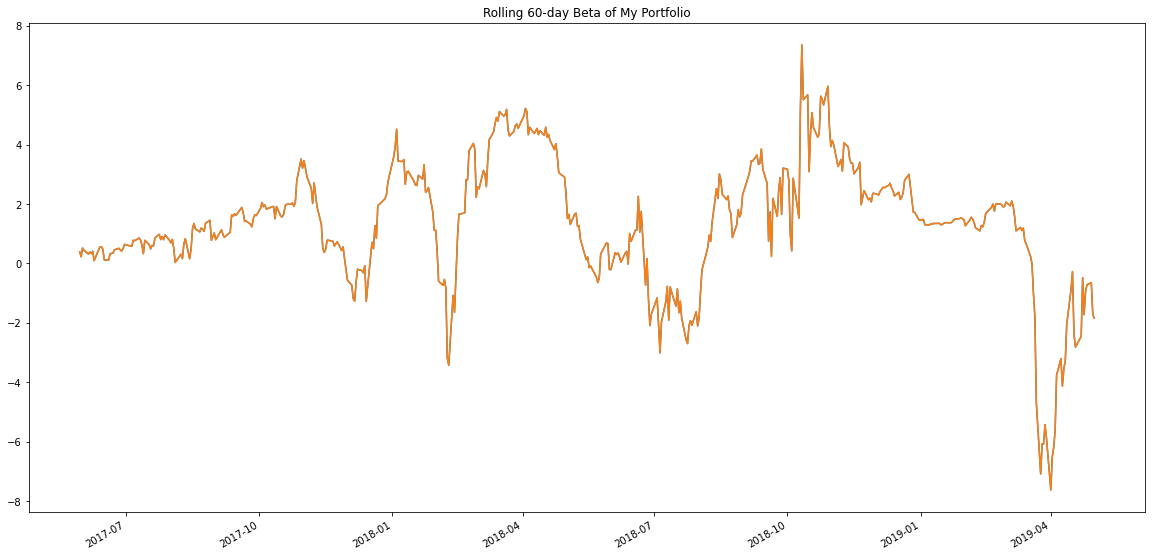

In [79]:
# Plot beta trend

ax = rolling_my_portfolio_beta.plot(figsize = (20, 10), title="Rolling 60-day Beta of My Portfolio")
rolling_my_portfolio_beta.plot(ax=ax)

In [80]:
# Sharpe Ratios
# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
# Annualized Sharpe Ratios

sharpe_custom_portfolio_ratios = (combined_custom_return_df.mean() * 252) / (combined_custom_return_df.std() * np.sqrt(252))
sharpe_custom_portfolio_ratios

TWTR    1.037263
FB      0.605217
SNAP   -0.198722
dtype: float64

In [81]:
sharpe_custom_portfolio_ratios = (total_df.mean() * 252) / (total_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

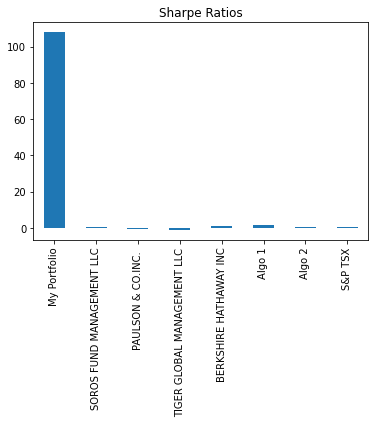

In [82]:
# Plot sharpe ratios using a bar chart
sharpe_custom_portfolio_ratios.plot.bar(title="Sharpe Ratios")

In [83]:
# My custom portfolio of (TWTR, FB and SNAP) is performing way better than the S&P TSX. However, it is also more volatile as compared to the market.